# Webscraping and Natural Language Processing

In [1]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/q7AM9QjCRrI" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Investigating texts from Project Gutenberg

![](images/gutenberg.png)

### List Review

In [2]:
a = [i for i in ['Uncle', 'Stever', 'has', 'a', 'gun']]

In [3]:
a

['Uncle', 'Stever', 'has', 'a', 'gun']

In [4]:
a[0]

'Uncle'

In [5]:
b = [i.lower() for i in a]

In [6]:
b

['uncle', 'stever', 'has', 'a', 'gun']

### Scraping the Text

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [6]:
url = "http://www.gutenberg.org/files/15784/15784-0.txt"

In [7]:
response = requests.get(url)

In [8]:
type(response)

requests.models.Response

In [9]:
response

<Response [200]>

In [10]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [11]:
len(soup_dos)

1

In [12]:
dos_text = soup_dos.get_text()

In [13]:
type(dos_text)

str

In [14]:
len(dos_text)

550924

In [15]:
dos_text[:100]

'The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended\r\nby Isaac Newton\r\n\r\nThis e'

### Using Regular Expressions

![](https://imgs.xkcd.com/comics/regular_expressions.png)

Regular expressions are a way to parse text using symbols to represent different kinds of textual characters.  For example, in the above sentence, notice that we have some symbols that are only there to impart formatting.  If we want to remove these, and only have the textual pieces, we can use a regular expression to find only words. 

In [16]:
import re
import pandas as pd

In [17]:
a = 'Who knew Johnny Depp was an undercover police officer (with Richard Greico)!'

In [18]:
ds = 'd\w+'

In [19]:
re.findall(ds, a)

['dercover']

In [20]:
ds = 'D\w+'

In [21]:
re.findall(ds, a)

['Depp']

In [22]:
ds = '[dD]\w+'

In [28]:
no_ds = '[^dD]\w+'

In [29]:
re.findall(no_ds, a)

['Who',
 ' knew',
 ' Johnny',
 ' Depp',
 ' was',
 ' an',
 ' undercover',
 ' police',
 ' officer',
 '(with',
 ' Richard',
 ' Greico']

In [30]:
words = re.findall('\w+', dos_text)

In [31]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

### Tokenization

Turning the document into a collection of individual items -- words.

In [32]:
from nltk.tokenize import RegexpTokenizer

In [54]:
tokenizer = RegexpTokenizer('[a-zA-Z]\w+[^\_\\r\\n__.:\-\""_, ]')

In [55]:
tokens = tokenizer.tokenize(dos_text)

In [56]:
tokens[:8]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'The',
 'Chronology',
 'Ancient',
 'Kingdoms']

In [57]:
words = []
for word in tokens:
    words.append(word.lower())

In [58]:
words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac']

### Stopwords

In [59]:
from nltk.corpus import stopwords

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
stop_words = set(stopwords.words('english'))

In [62]:
wordage = [word.strip() for word in words if word.isalpha()]

In [63]:
wordage[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac']

In [64]:
stop_words = set(stopwords.words('english'))
wordin = [w for w in words if not w in stop_words]
print(wordin[:100])

['project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'kingdoms', 'amended', 'isaac', 'newton', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'title', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe', 'conquest', 'persia', 'alexander', 'great', 'author', 'isaac', 'newton', 'release', 'date', 'may', 'ebook', 'language', 'english', 'character', 'set', 'encoding', 'unicode', 'utf', 'start', 'project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'produced', 'robert', 'shimmin', 'keith', 'edkins', 'online', 'distributed', 'proofreading', 'team', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe', 'conquest', 'persia', 'alexander', 'great', 'sir', 'isaac', 'newton', 'lond

### Analyzing the Text with NLTK

The Natural Language Toolkit is a popular Python library for text analysis.  We will use it to split the text into individual words(tokens), and create a plot of the frequency distribution of the tokens.  

In [65]:
import nltk

In [66]:
text = nltk.Text(wordin)

In [67]:
text[:10]

['project',
 'gutenberg',
 'ebook',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac',
 'newton',
 'ebook']

In [68]:
fdist = nltk.FreqDist(text)

In [69]:
type(fdist)

nltk.probability.FreqDist

In [70]:
fdist.most_common(10)

[('years', 539),
 ('year', 381),
 ('king', 378),
 ('egypt', 354),
 ('son', 322),
 ('reign', 281),
 ('kings', 273),
 ('first', 269),
 ('one', 238),
 ('days', 224)]

In [73]:
fdist['blood']

5

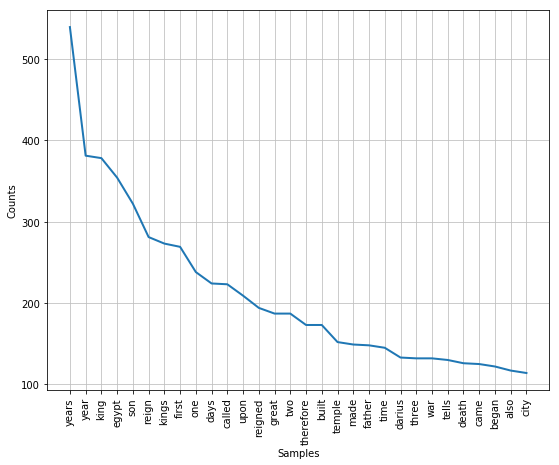

In [72]:
plt.figure(figsize = (9, 7))
fdist.plot(30)
fdist.

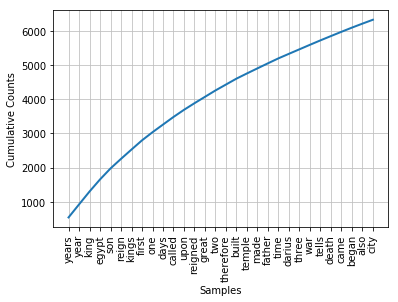

In [74]:
plt.figure()
fdist.plot(30, cumulative=True)

### Part of Speech Tagging

In [78]:
tagged = nltk.pos_tag(text)
# nltk.download('averaged_perceptron_tagger')

In [79]:
tagged[:10]

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('chronology', 'NN'),
 ('ancient', 'NN'),
 ('kingdoms', 'NNS'),
 ('amended', 'VBD'),
 ('isaac', 'JJ'),
 ('newton', 'NN'),
 ('ebook', 'NN')]

In [81]:
text.similar("king")

kings reigns reign reigned samuel artaxerxes raise subject time jews
government prince retired egypt solomon cyrus hystaspis father tells
assyria


In [85]:
text.common_contexts(["king", "reigns"])

erechtheus_athens ammon_egypt minos_crete tirhakah_ethiopia


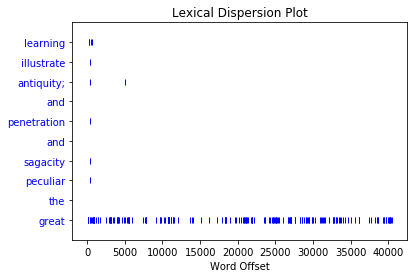

In [86]:
text.dispersion_plot(words[500:510])

### Lexical Richness of Text

In [87]:
len(text)

43181

In [88]:
len(set(text))/len(text)

0.18350663486255528

In [89]:
text.count("kings")

273

In [90]:
100*text.count("kings")/len(text)

0.6322225052685209

### Long Words, Bigrams, Collacations

In [91]:
long_words = [w for w in words if len(w)>10]

In [92]:
long_words[:10]

['restrictions',
 'distributed',
 'proofreading',
 'encouragement',
 'extraordinary',
 'productions',
 'protection;',
 'demonstration',
 'judiciousness',
 'observable;']

In [93]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [94]:
text.collocations()

project gutenberg; argonautic expedition; anno nabonass; red sea; year
nabonassar; return heraclides; hundred years; years piece; trojan war;
years death; alexander great; heraclides peloponnesus; death solomon;
one another; literary archive; high priest; assyrian empire; darius
hystaspis; archive foundation; electronic works


In [64]:
df = pd.read_csv('data/jumpstreet.csv', index_col = 0)

In [65]:
df.head()

,Actors,Character,Season,Episode,Title
0,Barney Martin,Charlie,1,1,"""Pilot""\n"
1,Brandon Douglas,Kenny Weckerle,1,1 & 2,"""Pilot""\n"
2,Reginald T. Dorsey,"Tyrell ""Waxer"" Thompson",1,1 & 2,"""Pilot""\n"
3,Billy Jayne,Mark Dorian,1,2,"""America, What a Town""\n"
4,Steve Antin,Stevie Delano,1,2,"""America, What a Town""\n"


### Task

1. Scrape and tokenize a text from project Gutenberg.

2. Compare the most frequent occurring words with and without stopwords removed.

3. Examine the top bigrams.  Create a barplot of the top 10 bigrams.

4. Create a topic model using our `scikitlearn` pipeline from last class.  Visualize and discuss in terms of the book.



**Further Reading**:  http://www.nltk.org/book/

In [ ]:
stop_words = set(stopwords.words('english'))
wordin = [w for w in words if not w in stop_words]

In [134]:
def gut_scraper(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    tt = soup.get_text()
    words = re.findall('\w+', tt)
    words = str(words)
    tokens = tokenizer.tokenize(tt)
    wrds = []
    stop_words = set(stopwords.words('english'))
    for word in tokens:
        if word not in stop_words:
            wrds.append(word.lower())
    fdist = nltk.FreqDist(wrds)
    plt.figure(figsize = (9, 7))
    fdist.plot(30)
    text = nltk.Text(wrds)
    print(text.collocations())

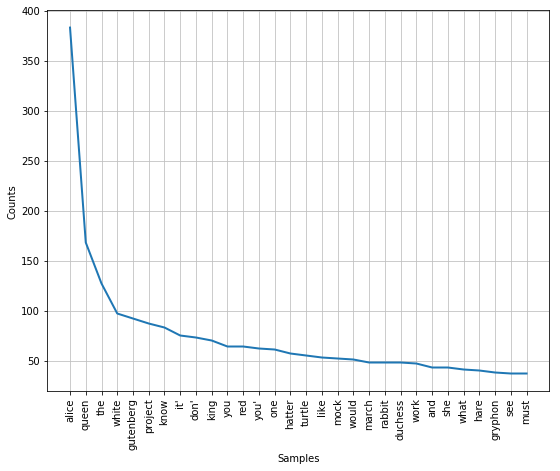

project gutenberg; mock turtle; march hare; red queen; humpty dumpty;
white rabbit; white queen; literary archive; archive foundation;
electronic works; united states; gutenberg electronic; gutenberg
literary; public domain; don' know; set forth; looking glass; bread
butter; terms agreement; gutenberg license
None


In [135]:
gut_scraper('http://www.gutenberg.org/cache/epub/35688/pg35688.txt')